### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### load the dataset

In [2]:
df = pd.read_csv('netflix1.csv')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
df.shape

(8790, 10)

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

### Data cleaning

In [6]:
# Check for missing values
print(df.isnull().sum())

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Drop rows with missing critical information
df.dropna(subset=['director', 'country'],
inplace=True)

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Show data types to confirm changes
print(df.dtypes)

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64
show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


### Exploratory Data Analysis(EDA)

#### Content Type Distribution (Movies vs. TV Shows)

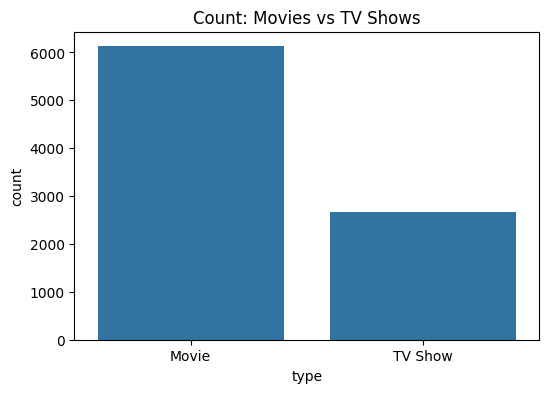

In [7]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type')
plt.title('Count: Movies vs TV Shows')
plt.show()

In [8]:
type_counts

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

#### Top genres

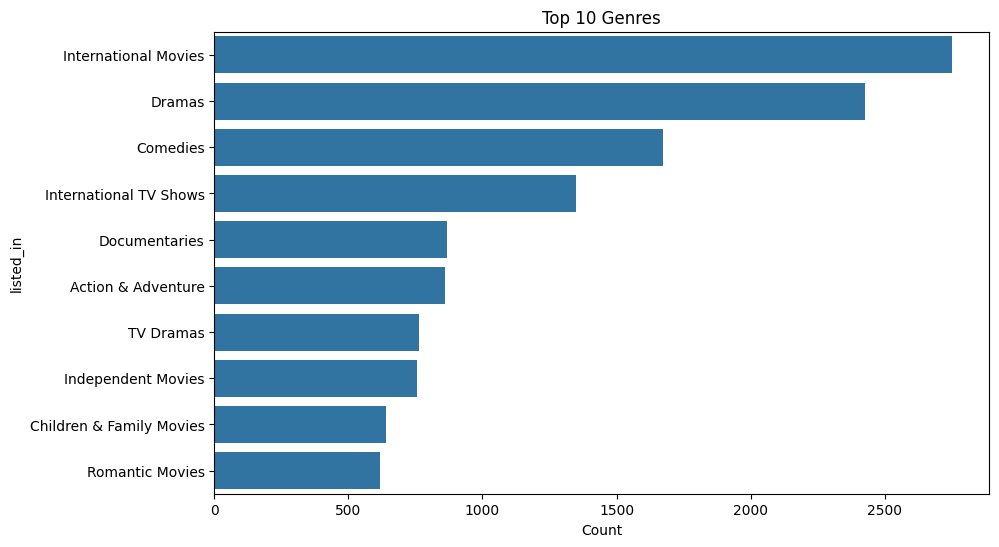

In [9]:
genres = df['listed_in'].str.split(',').explode().str.strip()
top_genres = genres.value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.show()

In [10]:
top_genres

listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

#### content per year

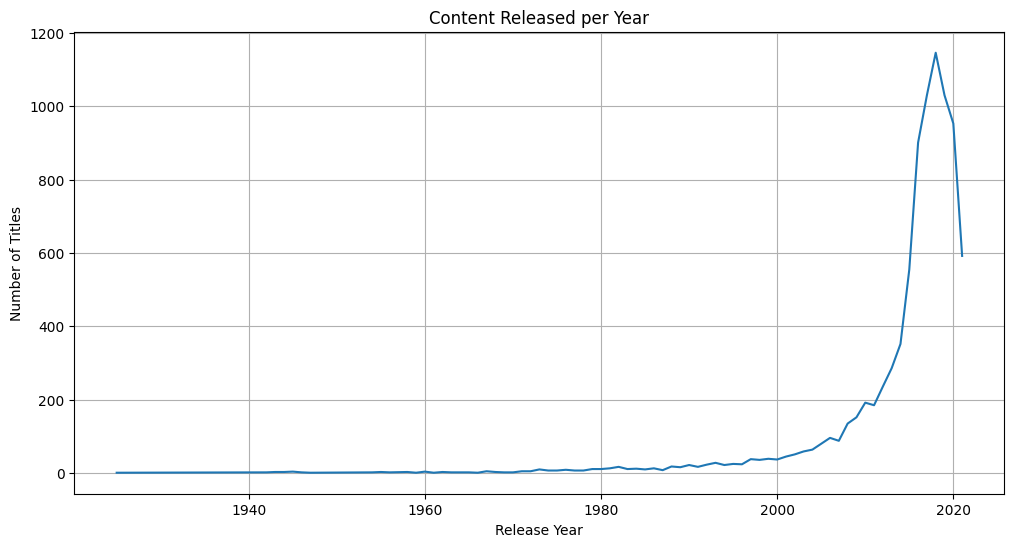

In [11]:
content_per_year = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
content_per_year.plot(kind='line')
plt.title('Content Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

In [12]:
content_per_year

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1030
2018    1146
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64

#### Top countries

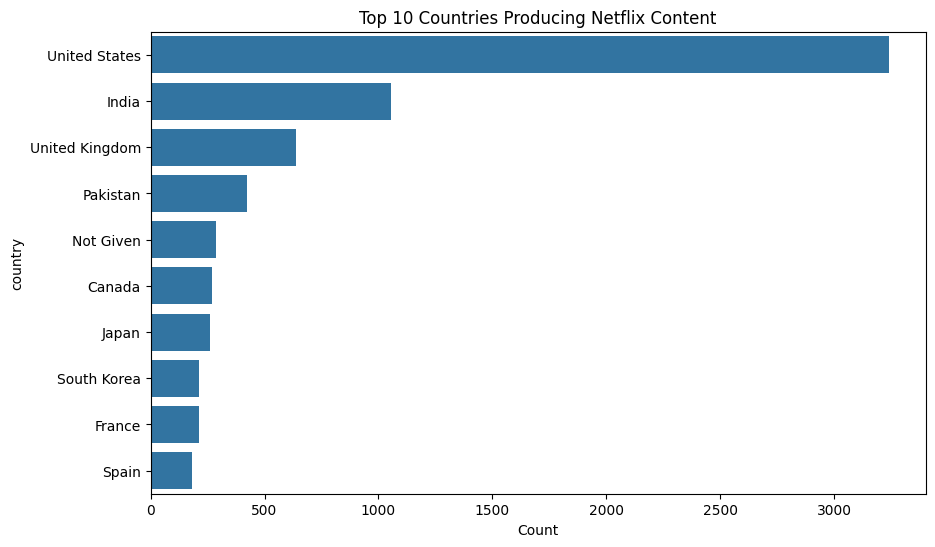

In [13]:
top_countries = df['country'].dropna().str.split(',').explode().str.strip().value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Count')
plt.show()

In [14]:
top_countries

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: count, dtype: int64

#### Top directors

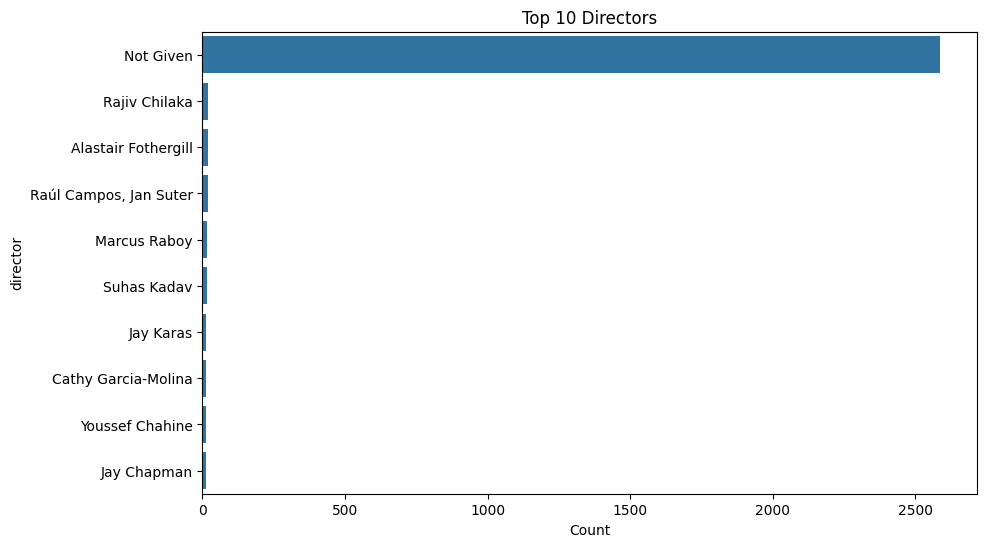

In [15]:
top_directors = df['director'].dropna().value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors')
plt.xlabel('Count')
plt.show()

In [16]:
top_directors

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Suhas Kadav                 16
Jay Karas                   14
Cathy Garcia-Molina         13
Youssef Chahine             12
Jay Chapman                 12
Name: count, dtype: int64

#### Ratings distribution

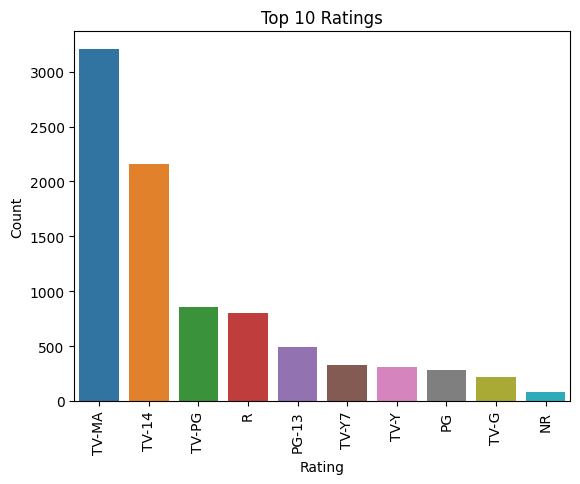

In [17]:
ratings = ['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G', 'NR']
counts = [3205, 2157, 861, 799, 490, 333, 306, 287, 220, 79]
df_new = pd.DataFrame({"Rating": ratings, "Count": counts})
sns.barplot(data=df_new, x="Rating", y="Count", hue="Rating", dodge=False, palette="tab10", legend=False)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Top 10 Ratings")
plt.xticks(rotation=90)
plt.show()

In [18]:
rating_counts = df['rating'].value_counts()
rating_counts

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

#### Time duration for movies and shows

In [19]:
# Function to extract numeric duration
def extract_duration(row):
    try:
        return int(row.split()[0])
    except:
        return np.nan

# Add numeric duration column
df['duration_int'] = df['duration'].apply(extract_duration)

# Separate by type
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Calculate averages
avg_movie_duration = movies['duration_int'].mean()
avg_tvshow_seasons = tv_shows['duration_int'].mean()

print(f" Average movie duration: {avg_movie_duration:.2f} minutes")
print(f" Average TV show length: {avg_tvshow_seasons:.2f} seasons")

 Average movie duration: 99.58 minutes
 Average TV show length: 1.75 seasons


#### Movie duration

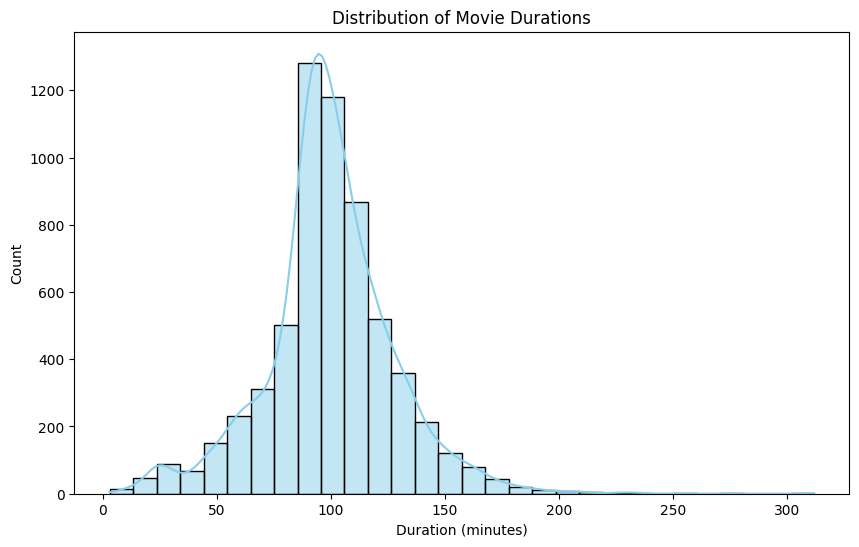

In [20]:
movies = df[df['type'] == 'Movie']

plt.figure(figsize=(10, 6))
sns.histplot(movies['duration_int'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

#### TV Show Durations

C:\Users\asus\AppData\Local\Temp\ipykernel_32716\2975445971.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='duration_int', data=tv_shows, palette='viridis')


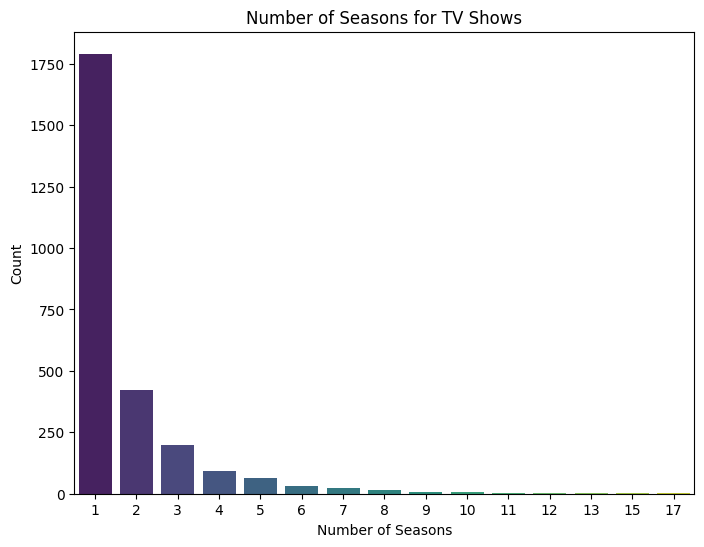

In [21]:
tv_shows = df[df['type'] == 'TV Show']

plt.figure(figsize=(8, 6))
sns.countplot(x='duration_int', data=tv_shows, palette='viridis')

plt.title('Number of Seasons for TV Shows')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


#### extracting monthly & yearly movies and tv shows

In [22]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

print(df[['date_added']].head())
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
df['month_num'] = df['date_added'].dt.month  # for sorting months correctly


  date_added
0 2021-09-25
1 2021-09-24
2 2021-09-24
3 2021-09-22
4 2021-09-24


In [23]:
# monthly releases
monthly = df.groupby(['month_num', 'month_added', 'type']).size().reset_index(name='Count')
monthly = monthly.sort_values('month_num')  # so months appear in order
print(monthly.head())


   month_num month_added     type  Count
0          1     January    Movie    545
1          1     January  TV Show    192
2          2    February    Movie    382
3          2    February  TV Show    180
4          3       March    Movie    528


In [24]:
# yearly release
yearly = df.groupby(['year_added', 'type']).size().reset_index(name='Count')
print(yearly.head())


   year_added     type  Count
0        2008    Movie      1
1        2008  TV Show      1
2        2009    Movie      2
3        2010    Movie      1
4        2011    Movie     13


### monthly releases of movies and tv-shows

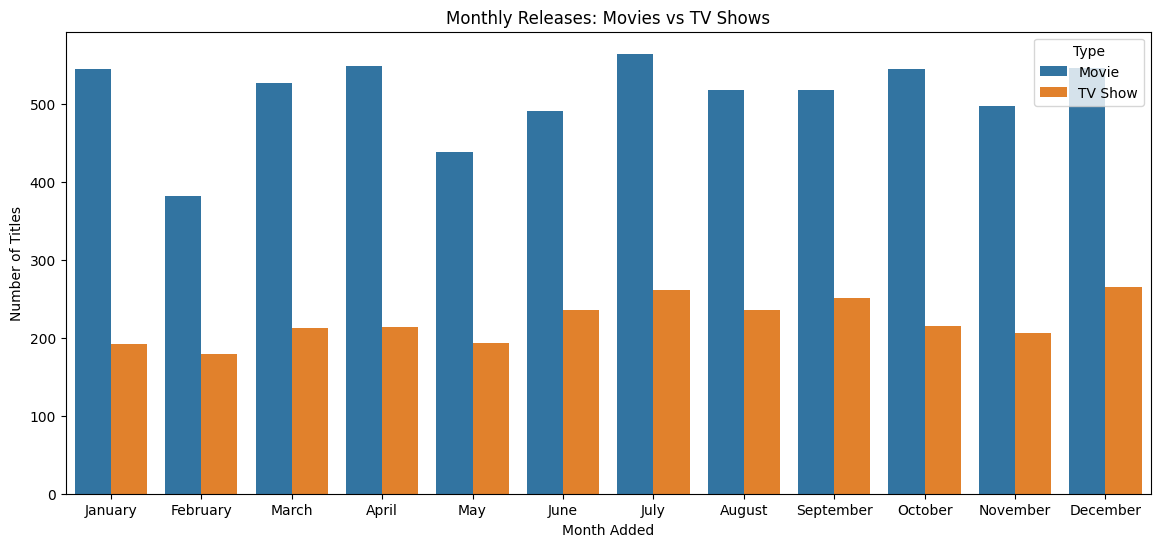

In [25]:
plt.figure(figsize=(14, 6))
sns.barplot(data=monthly, x='month_added', y='Count', hue='type', order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
plt.xlabel('Month Added')
plt.ylabel('Number of Titles')
plt.title('Monthly Releases: Movies vs TV Shows')
plt.legend(title='Type')
plt.show()


### yearly releases of movies and tv-shows

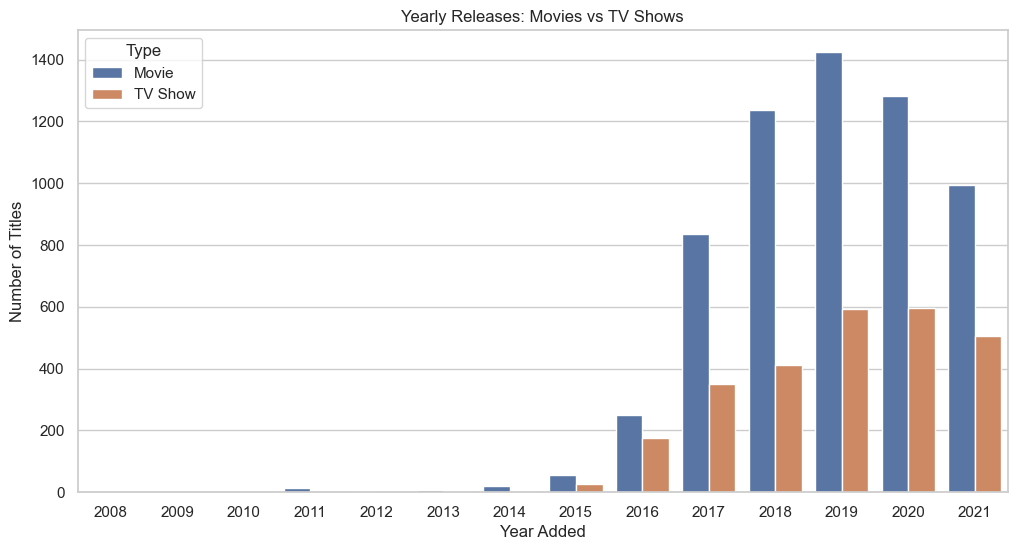

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly, x='year_added', y='Count', hue='type')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.title('Yearly Releases: Movies vs TV Shows')
plt.legend(title='Type')
plt.show()


### popular movies genre

Top 10 Movie Genres:
listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Name: count, dtype: int64


C:\Users\asus\AppData\Local\Temp\ipykernel_32716\3860740316.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=movie_genres_df, x='Genre', y='Count', palette='tab10')


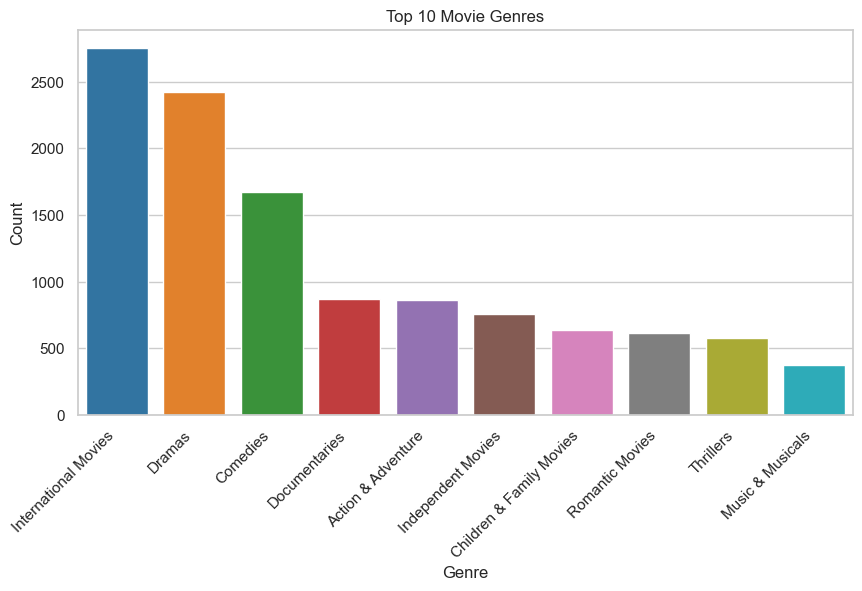

In [27]:
movies_df = df[df['type'] == 'Movie']
movie_genres = (
    movies_df['listed_in']
    .dropna()
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .head(10)
)
print("Top 10 Movie Genres:")
print(movie_genres)
movie_genres_df = movie_genres.reset_index()
movie_genres_df.columns = ['Genre', 'Count']
plt.figure(figsize=(10,5))
sns.barplot(data=movie_genres_df, x='Genre', y='Count', palette='tab10')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Movie Genres')
plt.show()

### popular tv-shows

Top 10 TV Show Genres:
listed_in
International TV Shows    1349
TV Dramas                  762
TV Comedies                573
Crime TV Shows             469
Kids' TV                   448
Docuseries                 394
Romantic TV Shows          370
Reality TV                 255
British TV Shows           252
Anime Series               174
Name: count, dtype: int64


C:\Users\asus\AppData\Local\Temp\ipykernel_32716\3651927683.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tvshow_genres_df, x='Genre', y='Count', palette='Set2')


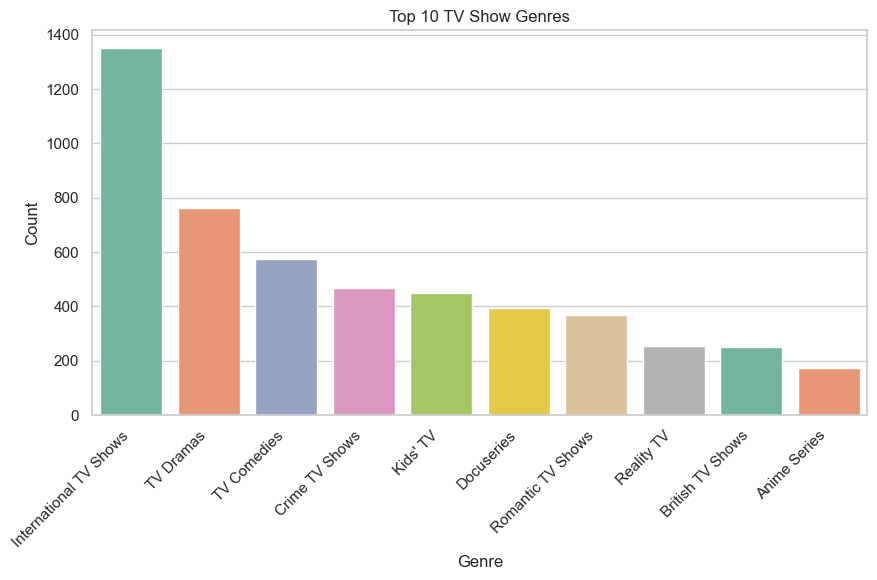

In [28]:
tvshows_df = df[df['type'] == 'TV Show']
tvshow_genres = (
    tvshows_df['listed_in']
    .dropna()
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .head(10)
)
print("Top 10 TV Show Genres:")
print(tvshow_genres)
# TV show genres
tvshow_genres_df = tvshow_genres.reset_index()
tvshow_genres_df.columns = ['Genre', 'Count']
plt.figure(figsize=(10,5))
sns.barplot(data=tvshow_genres_df, x='Genre', y='Count', palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 TV Show Genres')
plt.show()


## ** Summary**

This project explored a Netflix dataset of **8,790 titles**, including **Movies** and **TV Shows**. Using **Python, Pandas, Matplotlib, and Seaborn**, we:

* Cleaned and prepared the data.
* Analyzed key attributes (type, genres, countries, ratings, durations).
* Created visualizations to reveal patterns.
* Prepared the dataset for potential machine learning tasks.


##  **Key Findings**

**Content Type**

* \~70% of the catalog are **Movies** (6,126), \~30% are **TV Shows** (2,664).

**Top Genres**

* *International Movies*, *Dramas*, and *Comedies* are the most common genres.
* Multiple genres per title show Netflix’s diverse catalog.

**Countries**

* The **United States** dominates production (3,240 titles).
* **India** and the **United Kingdom** follow, showing Netflix’s global reach.

**Directors**

* Many titles don’t have a listed director (2,588 entries).
* Notable recurring directors include **Martin Scorsese** and popular regional creators.

**Ratings**

* The platform hosts mostly mature content: **TV-MA** and **TV-14** are most frequent.
* Family-friendly content (TV-Y, TV-G) is much smaller in comparison.

**Release Trends**

* Major spike in content production from **2016–2019**, peaking around 2018–2019.
* A slight drop in 2020–2021 likely reflects pandemic-related slowdowns.

**Durations**

* **Average movie duration:** around **90–100 minutes**.
* **TV Shows:** mostly limited series — most have **1–2 seasons**.

---

## **Conclusion**

Netflix’s catalog is dominated by **Movies**, primarily **Dramas**, **Comedies**, and **International content**. The majority is **mature-rated**, with most content produced in the **US**, **India**, and the **UK**. The data highlights Netflix’s global strategy and its focus on expanding original and diverse programming, especially during its rapid growth years (2016–2019).
